<a href="https://colab.research.google.com/github/PravinAmin/PravinAmin/blob/main/automated_personality_prediction_LR_KNN_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
#MBTI_DS = pd.read_csv("mbti_1.csv")
MBTI_DS = pd.read_csv("/content/drive/MyDrive/Thesis/MBTI500.csv")
MBTI_DS.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [4]:
MBTI_DS.isnull().any()


posts    False
type     False
dtype: bool

In [5]:
nRow, nCol = MBTI_DS.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 106067 rows and 2 columns


In [6]:
MBTI_DS.dtypes


posts    object
type     object
dtype: object

In [7]:
MBTI_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


**SUMMARY**

- JUST 2 columns in MBTI DATASET
- Number rows IS 106067
- No null valuesin MBTI DATASET
- All values are textual, So we should convert to numeric form to train the Machine Learning model

In [8]:
MBTI_DS.describe(include=['object'])

,posts,type
count,106067,106067
unique,106067,16
top,know intj tool use interaction people excuse a...,INTP
freq,1,24961


**We see**
There are 16 unique personality type indicators in the dataset
**INTP** most frequently occuring personality type

Number of occurences is 24961

In [9]:
types = np.unique(np.array(MBTI_DS['type']))
print("The Unique values 'type' of personality column",types)

The Unique values 'type' of personality column ['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [10]:
total = MBTI_DS.groupby(['type']).count().sort_values('posts',ascending=False)
print("The Total Posts for every Personality Type")
total

The Total Posts for every Personality Type


,posts
type,
INTP,24961
INTJ,22427
INFJ,14963
INFP,12134
ENTP,11725
ENFP,6167
ISTP,3424
ENTJ,2955
ESTP,1986


**Data visualization**

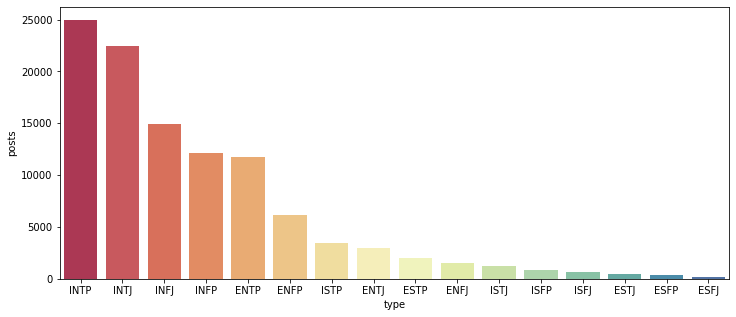

In [11]:
plt.figure(figsize=(12,5))
#df_bar_chart=MBTI_DS.groupby('Personality Types').count().sort_values('posts',ascending = False)
df_bar_chart=MBTI_DS.groupby('type').count().sort_values('posts',ascending = False)
sns.barplot(x=df_bar_chart.index, y=df_bar_chart['posts'],palette="Spectral")
plt.show()

In [12]:
MBTI_DS['Length'] = MBTI_DS['posts'].apply(lambda x: len(x.split(' ')))
MBTI_DS['Length'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: Length, dtype: float64

In [13]:
MBTI_Pred = MBTI_DS.sample(frac=0.1)
len(MBTI_Pred)

10607

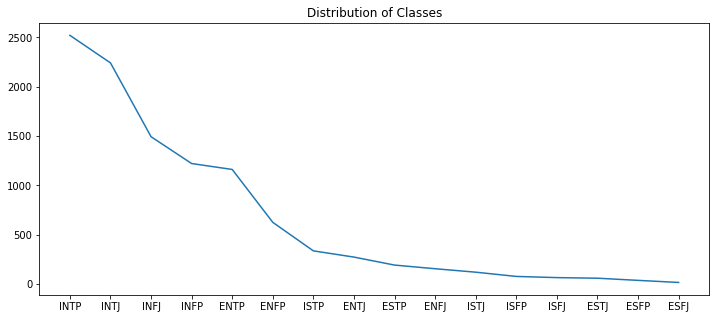

In [14]:
plt.figure(figsize=(12,5))
#plt.plot(MBTI_Pred['Personality Type'].value_counts())
plt.plot(MBTI_Pred['type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [15]:
Words = list()
for i in list(MBTI_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [16]:
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

71870


,Frequency
Word,
like,69934
think,59755
people,55315
get,53319
thing,40961


In [17]:
Words_dic['Frequency'].describe()

count    71870.000000
mean        73.797106
std        865.395553
min          1.000000
25%          1.000000
50%          1.000000
75%          6.000000
max      69934.000000
Name: Frequency, dtype: float64

In [18]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
2.0
4.0
10.0
39.0


In [19]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

47.0
58.0
74.0
96.0
133.0
190.2399999999907
291.0
533.6199999999953
1341.2399999999907


In [20]:
#Final_Words = list(Words_dic.index)
#for i in Final_Words:
#    MBTI_DS[i] = MBTI_DS['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
#MBTI_DS.drop(['Length','posts'],axis=1,inplace=True)
MBTI_DS.head()

,posts,type,Length
0,know intj tool use interaction people excuse a...,INTJ,501
1,rap music ehh opp yeah know valid well know fa...,INTJ,501
2,preferably p hd low except wew lad video p min...,INTJ,501
3,drink like wish could drink red wine give head...,INTJ,501
4,space program ah bad deal meing freelance max ...,INTJ,501


The MBTI DATASET is unbalanced throughout the different classes. Some personality types has more data than others, The **INTP (Introverted, Intuitive, Thinking, Perceiving)** the highest

Since the original dataset only came with 2 features, the Type and posts. Lets create additional features for exploring & analysing our dataset.

After we added our features, we did some data exploration to see how the raw data looks and to see how important our features were for distinguishing types across the MBTI personalities. Below are plots further showing the type imbalances in our data.


In [21]:
#Finding the most common words in all posts.
words = list(MBTI_DS["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('like', 698166),
 ('think', 595961),
 ('people', 553946),
 ('get', 533097),
 ('thing', 406537),
 ('make', 405953),
 ('know', 379682),
 ('feel', 373270),
 ('one', 369594),
 ('go', 363834),
 ('time', 352696),
 ('say', 350470),
 ('good', 341323),
 ('would', 335297),
 ('really', 323825),
 ('want', 287891),
 ('way', 264569),
 ('see', 237915),
 ('work', 230969),
 ('also', 230654),
 ('much', 229541),
 ('something', 226654),
 ('try', 219275),
 ('take', 211284),
 ('find', 209472),
 ('type', 209292),
 ('even', 206729),
 ('well', 194101),
 ('friend', 190502),
 ('need', 188813),
 ('lot', 186672),
 ('use', 182523),
 ('love', 170279),
 ('life', 169150),
 ('someone', 168552),
 ('mean', 165912),
 ('come', 159590),
 ('could', 155599),
 ('look', 155229),
 ('talk', 152378),
 ('though', 147193),
 ('person', 146272),
 ('give', 144653),
 ('always', 142256),
 ('never', 136537),
 ('interest', 134950),
 ('right', 134597),
 ('seem', 133619),
 ('understand', 131949),
 ('actually', 131498)]

The posts contain general words like : I, to, the, a, and, of, is, you etc. 

we assume that these words don't really provide any useful information to train the Machine Learning model as most of them are stop-words or other useless words.


**WORDCLOUD**

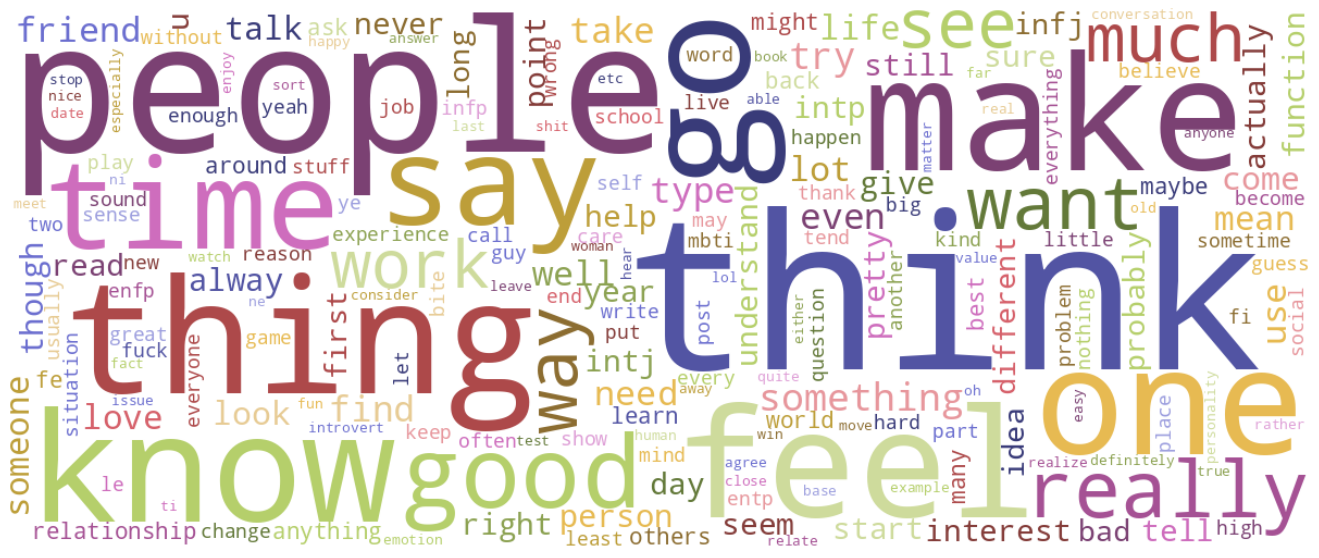

In [22]:

wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b_r").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

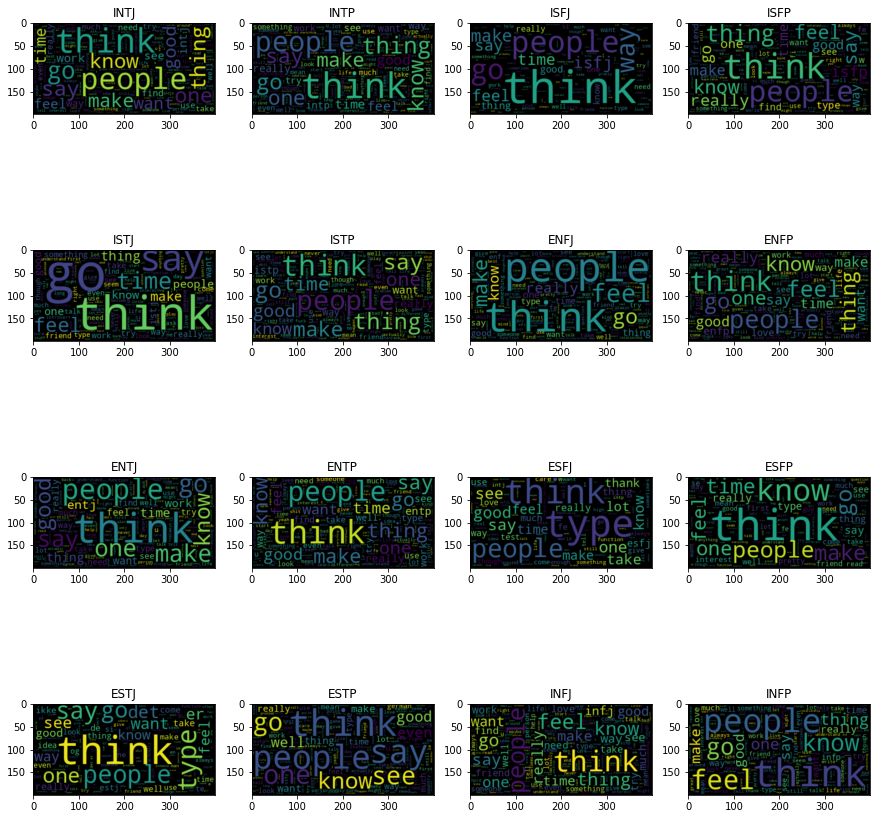

In [23]:
fig, ax = plt.subplots(len(MBTI_DS['type'].unique()), figsize=(15,len(MBTI_DS['type'].unique())))
k = 0
for i in MBTI_DS['type'].unique():
    df_4 = MBTI_DS[MBTI_DS['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

we can see there are a number of irrelevant words present in the dataset **(e.g. ha, ar, Ti etx.)** which will need to be removed Interestingly, among the most common words in the word clouds of individual personality types, is the **names of MBTI personlity types themselves**.
It would hence be necessary to clean our posts by removing these MBTI words from each of them as part of our pre-processing stage, before training the model for better evaluation results.


In [24]:
#add columns for personality type indicators

def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

MBTI_DS_N = MBTI_DS.join(MBTI_DS.apply (lambda row: get_types (row),axis=1))
MBTI_DS_N.head(10)


,posts,type,Length,IE,NS,TF,JP
0,know intj tool use interaction people excuse a...,INTJ,501,1,1,1,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,501,1,1,1,1
2,preferably p hd low except wew lad video p min...,INTJ,501,1,1,1,1
3,drink like wish could drink red wine give head...,INTJ,501,1,1,1,1
4,space program ah bad deal meing freelance max ...,INTJ,501,1,1,1,1
5,loose stop overthinking everything ruin friend...,INTJ,501,1,1,1,1
6,often men one put chance get burn otherwise no...,INTJ,501,1,1,1,1
7,early definitely relate quiet self destruction...,INTJ,501,1,1,1,1
8,one full list would impossibly long quotable f...,INTJ,501,1,1,1,1
9,technique information power share unless absol...,INTJ,501,1,1,1,1


The above code assigns a value of 1 to individuals who possess the traits of Introversion (I), Intuition (N), Thinking (T), and Judging (J) on the four axes of the Myers-Briggs Type Indicator (MBTI) - Introversion-Extraversion (IE), Intuition-Sensing (NS), Feeling-Thinking (FT), and Judging-Perceiving (JP). All other individuals are assigned a value of 0.

This allows us to calculate the number of posts that correspond to introverted individuals versus extroverted individuals out of all the entries in the labeled Kaggle dataset. This analysis is conducted to examine the dataset for each individual personality index of the MBTI.


In [25]:
#Counting Number posts in one class | Total Number posts in other class

print ("Introversion (I) |  Extroversion (E): \t", MBTI_DS_N['IE'].value_counts()[0], " | ", MBTI_DS_N['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", MBTI_DS_N['NS'].value_counts()[0], " | ", MBTI_DS_N['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", MBTI_DS_N['TF'].value_counts()[0], " | ", MBTI_DS_N['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", MBTI_DS_N['JP'].value_counts()[0], " | ", MBTI_DS_N['JP'].value_counts()[1])


Introversion (I) |  Extroversion (E): 	 25390  |  80677
Intuition    (N) |  Sensing      (S): 	 9201  |  96866
Thinking     (T) |  Feeling      (F): 	 36864  |  69203
Judging      (J) |  Perceiving   (P): 	 61632  |  44435


We can see that there is an uneven distribution of the entries in our dataset across the four axes of the MBTI, with E being the majority in the IE axis, S being the majority in the NS axis, and relatively less difference between T and F in the TF axis, and J and P in the JP axis.


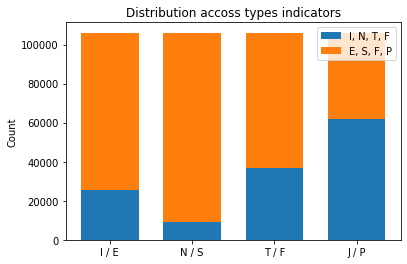

In [26]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (MBTI_DS_N['IE'].value_counts()[0], MBTI_DS_N['NS'].value_counts()[0], MBTI_DS_N['TF'].value_counts()[0], MBTI_DS_N['JP'].value_counts()[0])
top = (MBTI_DS_N['IE'].value_counts()[1], MBTI_DS_N['NS'].value_counts()[1], MBTI_DS_N['TF'].value_counts()[1], MBTI_DS_N['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()


<AxesSubplot:title={'center':'Features Correlation Heatmap'}>

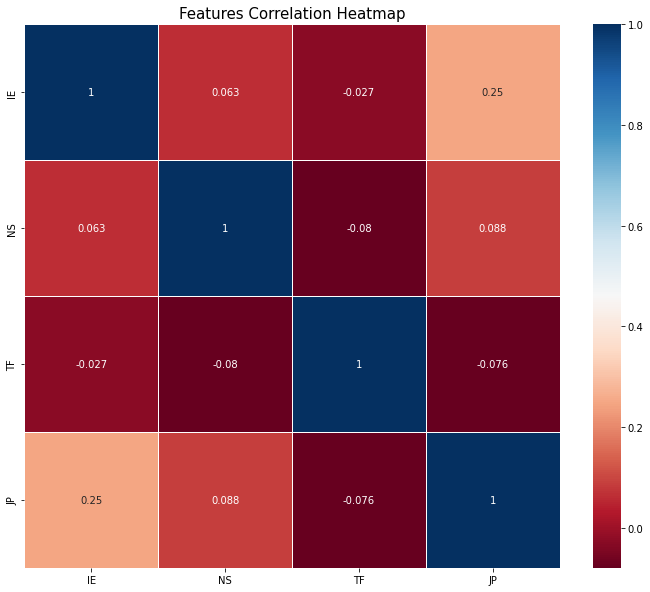

In [27]:
cmap = plt.cm.RdBu
corr = MBTI_DS_N[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)


From this heatmap also, it is unclear if it shows anything valuable for interpretation



**SUMMARY**
We notice that there are a number of irrelevant words present in the dataset, such as "ha," "ar," and "Ti," which need to be removed. Additionally, we observe that among the most frequent words in the word clouds of individual personality types, are the names of the MBTI personality types themselves. Therefore, it is important to clean the posts by removing these MBTI words from each of them as part of the pre-processing stage before training the model to achieve better evaluation results.

**Pre-Processing Stage**

We preprocess the posts by using Lemmatization technique. Lemmatization groups together different inflected forms of a word so they can be analyzed as a single item. Unlike stemming, lemmatization takes into account the context of the word, making it a more suitable choice for our model. This technique links words with similar meanings to one word, resulting in a more accurate analysis.

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed 
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]


Binarizing the each personality type feature



In [31]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':1, 'E':0, 'N':1, 'S':0, 'F':0, 'T':1, 'J':1, 'P':0}
b_Pers_list = [{1:'I', 0:'E'}, {1:'N', 0:'S'}, {0:'F', 1:'T'}, {1:'J', 0:'P'}]

def translate_personality(personality):
    # Transform MBTI to binary vector
    return [b_Pers[l] for l in personality]

#Show result output for personality prediction
def translate_back(personality):
    # transform binary vector to MBTI personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in MBTI_DS_N.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 ...
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]]


**Cleaning Data in posts**

In [32]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [33]:
def pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True):
    list_personality = []
    list_posts = []
    len_MBTI_DS_N = len(MBTI_DS_N)
    i=0
    for row in MBTI_DS_N.iterrows():
        #Remove and clean comments
        posts = row[1].posts
        
        #Remove url links 
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        
        #Remove Non-words - keep only words
        temp = re.sub("[^a-zA-Z]", " ", temp)
        
        # Remove spaces > 1
        temp = re.sub(' +', ' ', temp).lower()
        
        #Remove multiple letter repeating words
        temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)
        
        #Remove stop words
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        #Remove MBTI personality words from posts
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

      # transform mbti to binary vector
        type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
      # the cleaned data temp is passed here
        list_posts.append(temp)

  # returns the result
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality  = pre_process_text(MBTI_DS_N, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", MBTI_DS_N.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", MBTI_DS_N.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])


Example :

Post before preprocessing:

 know intj tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad intj u stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like u specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number con

In [34]:
nRow, nCol = list_personality.shape
print(f'Number of posts = {nRow}  and No. of Personalities = {nCol} ')


Number of posts = 106067  and No. of Personalities = 4 


**Feature Engineering - TF-IDF**

In our model, we use Tf-idf feature engineering to determine the relevance and importance of a word in relation to a document within a collection of documents. This technique is particularly useful for training individual classifiers and scoring words in machine learning algorithms for natural language processing. We vectorize the dataset using both count vectorizer and tf-idf vectorizer, while only keeping words that appear between 10-70% of the posts.

In [35]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.7,
                             min_df=0.1) 
# the feature should be made of word n-gram 

# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)


Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually')]

Using Tf-idf :
Now the dataset size is as below
(106067, 593)


**Therefore we now have 595 features for each user post.**


Splitting into X and Y variable

linkcode
Hence we split the features as :

X: User Posts in TF-IDF representation

Y: Personality type in Binarized MBTI form

In [36]:

personality_type = [ "IE: Introversion (I) | Extroversion (E)", "NS: Intuition    (N) | Sensing      (S)", 
                   "FT: Feeling      (F) | Thinking     (T)", "JP: Judging      (J) | Perceiving   (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])


IE: Introversion (I) | Extroversion (E)
NS: Intuition    (N) | Sensing      (S)
FT: Feeling      (F) | Thinking     (T)
JP: Judging      (J) | Perceiving   (P)


Let's see how the posts look in TF-IDF representation: (we have taken 1st post for demonstration)

In [37]:
print("X: First post in tf-idf representation\n%s" % X_tfidf[0])


X: First post in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05592566 0.04320921 0.         0.         0.
 0.         0.         0.04817355 0.03138687 0.         0.
 0.06879074 0.         0.04180474 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05918586 0.         0.         0.
 0.         0.06002807 0.         0.         0.04687716 0.
 0.         0.07062991 0.04666071 0.         0.04134422 0.
 0.         0.         0.         0.         0.03574798 0.
 0.         0.         0.         0.         0.         0.
 0.05069953 0.         0.         0.         0.         0.
 0.         0.13797997 0.04917915 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0567533  0.17515357 0.         0.         0.         0.
 0.17554135 0.02950933 0.         0.05244297 0.         0.
 0.         0.   

Let's see how the posts look in Binarized MBTI personality indicator representation: (we have taken 1st post for demonstration)


In [38]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])


For MBTI personality type : INTJ
Y : Binarized MBTI 1st row: [1 1 1 1]


**Therefore we have successfully converted the textual data into numerical form**



**Training & Evaluating Models**

In [39]:
X = X_tfidf
Y = list_personality[:,l]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)


In [40]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")

IE: Introversion (I) | Extroversion (E) Accuracy: 78.47%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.64      0.27      0.38     17019
           1       0.81      0.95      0.87     54045

    accuracy                           0.79     71064
   macro avg       0.73      0.61      0.63     71064
weighted avg       0.77      0.79      0.76     71064

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.62      0.26      0.37      8371
           1       0.80      0.95      0.87     26632

    accuracy                           0.78     35003
   macro avg       0.71      0.60      0.62     35003
weighted avg       0.76      0.78      0.75     35003



NS: Intuition    (N) | Sensing      (S) Accuracy: 92.14%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data


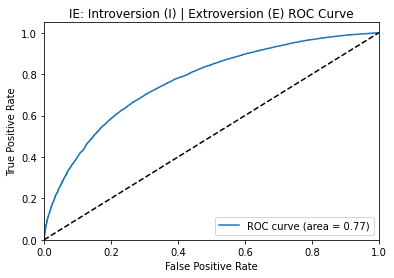

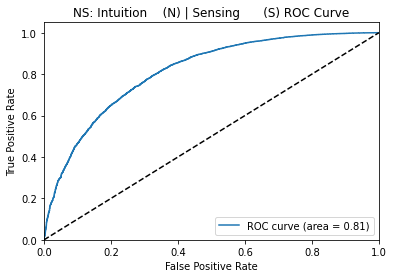

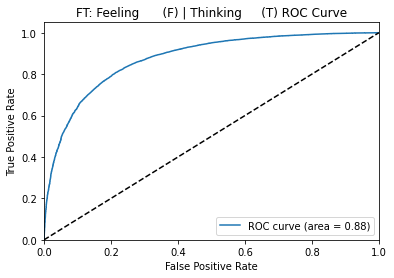

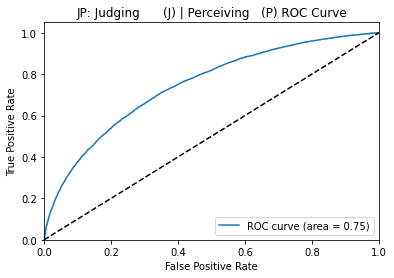

In [41]:
from sklearn.metrics import roc_curve, auc

for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict_proba(X_test)[:,1] # use predict_proba instead of predict for ROC curve
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('%s ROC Curve' % (personality_type[l]))
    plt.legend(loc="lower right")
    plt.show()



K-value 1

K-Nearest Neighbors - Train ConfusionMatrix

 Predicted      0      1
Actuall                
0          41229    106
1              7  29722

K-Nearest Neighbors - Train accuracy: 0.998

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41335
           1       1.00      1.00      1.00     29729

    accuracy                           1.00     71064
   macro avg       1.00      1.00      1.00     71064
weighted avg       1.00      1.00      1.00     71064



K-Nearest Neighbors - Test Confusion Matrix

 Predicted     0      1
Actuall               
0          1434  18863
1           757  13949

K-Nearest Neighbors - Test accuracy: 0.439

K-Nearest Neighbors - Test Classification Report
               precision    recall  f1-score   support

           0       0.65      0.07      0.13     20297
           1       0.43      0.95      0.59     14706

    accuracy           

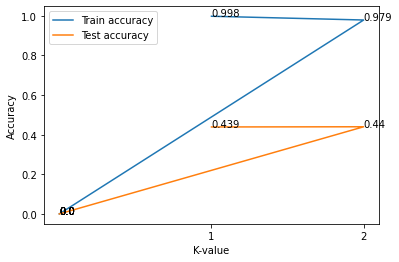

In [42]:
#KNN Classifier
from sklearn.metrics import accuracy_score,classification_report

# Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]
k_vals = [1,2]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(X_train,y_train)
    print ("\nK-value",k_vals[i])
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(X_train)),3)
    print ("\nK-Nearest Neighbors - Train ConfusionMatrix\n\n",pd.crosstab( y_train, knn_fit.predict(X_train),rownames =["Actuall"],colnames = ["Predicted"]) )
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(y_train,knn_fit.predict(X_train)))
    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(X_test)),3)
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab( y_test,knn_fit.predict(X_test),rownames =["Actuall"],colnames = ["Predicted"]))
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(X_test)))
    k_valchart.loc[i, 'K_value'] = k_vals[i]
    k_valchart.loc[i, 'Train_acc'] = tr_accscore
    k_valchart.loc[i, 'Test_acc'] = ts_accscore

import matplotlib.pyplot as plt

# plot the train and test accuracy scores for different K-values
plt.plot(k_valchart['K_value'], k_valchart['Train_acc'], label='Train accuracy')
plt.plot(k_valchart['K_value'], k_valchart['Test_acc'], label='Test accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_valchart['K_value'])
plt.xticks([1,2])
for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)
for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
plt.legend()
plt.show()


IE: Introversion (I) | Extroversion (E) Accuracy: 77.97%
IE: Introversion (I) | Extroversion (E) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.93      0.56      0.70     17019
           1       0.88      0.99      0.93     54045

    accuracy                           0.88     71064
   macro avg       0.91      0.77      0.81     71064
weighted avg       0.89      0.88      0.87     71064

IE: Introversion (I) | Extroversion (E) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.59      0.26      0.36      8371
           1       0.80      0.94      0.87     26632

    accuracy                           0.78     35003
   macro avg       0.70      0.60      0.62     35003
weighted avg       0.75      0.78      0.75     35003





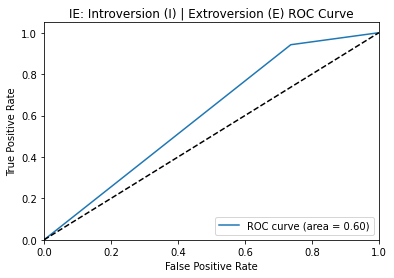

NS: Intuition    (N) | Sensing      (S) Accuracy: 92.01%
NS: Intuition    (N) | Sensing      (S) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.99      0.55      0.71      6200
           1       0.96      1.00      0.98     64864

    accuracy                           0.96     71064
   macro avg       0.98      0.77      0.84     71064
weighted avg       0.96      0.96      0.96     71064

NS: Intuition    (N) | Sensing      (S) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.66      0.14      0.23      3001
           1       0.92      0.99      0.96     32002

    accuracy                           0.92     35003
   macro avg       0.79      0.57      0.59     35003
weighted avg       0.90      0.92      0.90     35003





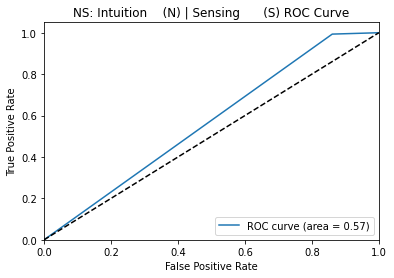

FT: Feeling      (F) | Thinking     (T) Accuracy: 79.37%
FT: Feeling      (F) | Thinking     (T) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     24805
           1       0.91      0.96      0.93     46259

    accuracy                           0.91     71064
   macro avg       0.91      0.89      0.90     71064
weighted avg       0.91      0.91      0.91     71064

FT: Feeling      (F) | Thinking     (T) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.74      0.62      0.67     12059
           1       0.82      0.89      0.85     22944

    accuracy                           0.79     35003
   macro avg       0.78      0.75      0.76     35003
weighted avg       0.79      0.79      0.79     35003





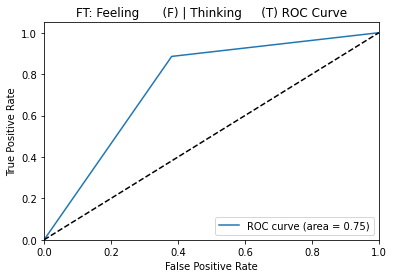

JP: Judging      (J) | Perceiving   (P) Accuracy: 68.13%
JP: Judging      (J) | Perceiving   (P) Classification report for Train Data
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     41335
           1       0.86      0.75      0.80     29729

    accuracy                           0.84     71064
   macro avg       0.85      0.83      0.84     71064
weighted avg       0.85      0.84      0.84     71064

JP: Judging      (J) | Perceiving   (P) Classification report for Test Data
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     20297
           1       0.65      0.54      0.59     14706

    accuracy                           0.68     35003
   macro avg       0.67      0.66      0.66     35003
weighted avg       0.68      0.68      0.68     35003





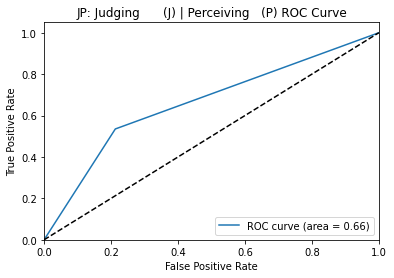

In [43]:
#XGBoost model for MBTI dataset 
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))
    print("%s Classification report for Train Data" % (personality_type[l]))
    print(classification_report(y_train,model.predict(X_train)))
    print("%s Classification report for Test Data" % (personality_type[l]))
    print(classification_report(y_test, y_pred))
    print("\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('%s ROC Curve' % (personality_type[l]))
    plt.legend(loc="lower right")
    plt.show()

